Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2 sex - student's sex (binary: 'F' - female or 'M' - male) 
3 age - student's age (numeric: from 15 to 22) 
4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16 schoolsup - extra educational support (binary: yes or no) 
17 famsup - family educational support (binary: yes or no) 
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19 activities - extra-curricular activities (binary: yes or no) 
20 nursery - attended nursery school (binary: yes or no) 
21 higher - wants to take higher education (binary: yes or no) 
22 internet - Internet access at home (binary: yes or no) 
23 romantic - with a romantic relationship (binary: yes or no) 
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
30 absences - number of school absences (numeric: from 0 to 93) 

# these grades are related with the course subject, Math or Portuguese: 
31 G1 - first period grade (numeric: from 0 to 20) 
31 G2 - second period grade (numeric: from 0 to 20) 
32 G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

### Importing the data set

In [13]:
df_por=pd.read_csv('student-por.csv', sep=';')
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Data Exploration

### Univariant analysis
•	WoE, IV for each variable
•	Selection of most predictive variables
•	Coarse classing – grouping by WoE
•	Story telling – problem description


#### WoE, IV for each variable

In [14]:
# set a target variable
df_por['target'] = df_por['G3']
df=df_por.drop('G3',axis=1)

In [15]:
df['target'] = (df['target']>=6)
df['target'].value_counts()

True     632
False     17
Name: target, dtype: int64

In [22]:
a=(df['target']).value_counts()
round(a[0]/df['target'].value_counts().sum()*100,2)

2.62

Only 2.62% of students got grades from 0 to 5

In [30]:
df['target'] = df['target'].astype(int)
df['target'].value_counts()

1    632
0     17
Name: target, dtype: int64

In [31]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,target
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,1


In [32]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [33]:
final_iv, IV = data_vars(df,df.target)

In [34]:
final_iv.head()

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,school,GP,GP,423,420,0.992908,3,0.007092,0.664557,0.176471,1.325966,1.085559
1,school,MS,MS,226,212,0.938053,14,0.061947,0.335443,0.823529,-0.898147,1.085559
2,sex,F,F,383,376,0.981723,7,0.018277,0.594937,0.411765,0.368003,0.135746
3,sex,M,M,266,256,0.962406,10,0.037594,0.405063,0.588235,-0.373084,0.135746
4,age,15,16,289,286,0.989619,3,0.010381,0.452532,0.176471,0.941703,0.859309


In [35]:
IV.head()

,VAR_NAME,IV
0,Dalc,0.223359
1,Fedu,0.473106
2,Fjob,0.074065
3,G1,1.140578
4,G2,0.351962


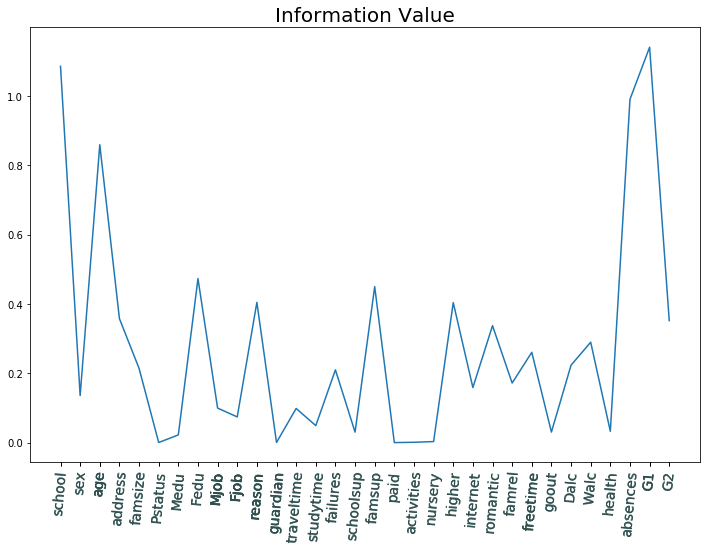

In [36]:
plt.figure(figsize=(12,8))
plt.plot(final_iv['VAR_NAME'], final_iv['IV'])
plt.title('Information Value', fontsize=20)
plt.xticks(final_iv['VAR_NAME'], rotation=85, fontsize=14, color='darkslategray' )
plt.show()

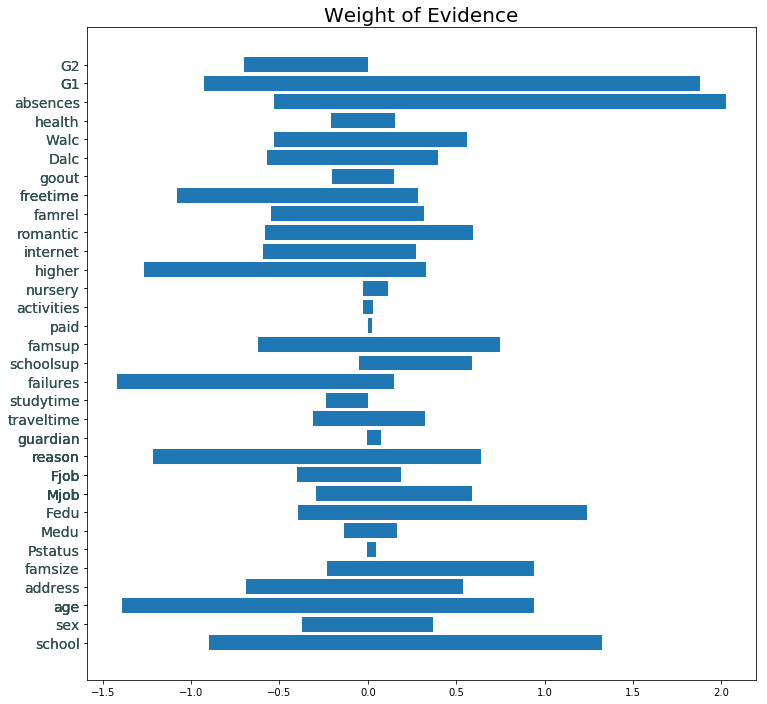

In [37]:
plt.figure(figsize=(12,12))
plt.barh(final_iv['VAR_NAME'],
            final_iv['WOE'])
plt.title('Weight of Evidence', fontsize=20)
plt.yticks(final_iv['VAR_NAME'], rotation=0, fontsize=14, color='darkslategray' )
plt.show()
# if woe is zero - skip it


In [38]:
IV.sort_values('IV',ascending=False).head(8)

,VAR_NAME,IV
3,G1,1.140578
27,school,1.085559
9,absences,0.990359
12,age,0.859309
1,Fedu,0.473106
16,famsup,0.449896
25,reason,0.404612
21,higher,0.403847


In [39]:
final_iv.sort_values('WOE',ascending=False).head(8)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
71,absences,3,32,283,282,0.996466,1,0.003534,0.446203,0.058824,2.026231,0.990359
73,G1,11,13,245,244,0.995918,1,0.004082,0.386076,0.058824,1.881492,1.140578
0,school,GP,GP,423,420,0.992908,3,0.007092,0.664557,0.176471,1.325966,1.085559
17,Fedu,3,4,259,257,0.992278,2,0.007722,0.406646,0.117647,1.240253,0.473106
4,age,15,16,289,286,0.989619,3,0.010381,0.452532,0.176471,0.941703,0.859309
11,famsize,LE3,LE3,192,190,0.989583,2,0.010417,0.300633,0.117647,0.938201,0.214206
5,age,17,17,179,177,0.988827,2,0.011173,0.280063,0.117647,0.867327,0.859309
44,famsup,yes,yes,398,393,0.987437,5,0.012563,0.621835,0.294118,0.748696,0.449896


####  Selection of most predictive variables

In [40]:
final_iv.query('0.3<= IV <= 0.5')

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
8,address,R,R,197,187,0.949239,10,0.050761,0.295886,0.588235,-0.687153,0.357730
9,address,U,U,452,445,0.984513,7,0.015487,0.704114,0.411765,0.536488,0.357730
16,Fedu,0,2,390,375,0.961538,15,0.038462,0.593354,0.882353,-0.396800,0.473106
17,Fedu,3,4,259,257,0.992278,2,0.007722,0.406646,0.117647,1.240253,0.473106
28,reason,course,course,285,279,0.978947,6,0.021053,0.441456,0.352941,0.223776,0.404612
29,reason,home,home,149,146,0.979866,3,0.020134,0.231013,0.176471,0.269318,0.404612
30,reason,other,other,72,66,0.916667,6,0.083333,0.104430,0.352941,-1.217781,0.404612
31,reason,reputation,reputation,143,141,0.986014,2,0.013986,0.223101,0.117647,0.639937,0.404612
43,famsup,no,no,251,239,0.952191,12,0.047809,0.378165,0.705882,-0.624119,0.449896
44,famsup,yes,yes,398,393,0.987437,5,0.012563,0.621835,0.294118,0.748696,0.449896


We can see that there are few attributes in a range 0.3-0.5. Address - student's home address type (binary: 'U' - urban or 'R' - rural), Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education), reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other'), famsup - family educational support (binary: yes or no), higher - wants to take higher education (binary: yes or no), romantic - with a romantic relationship (binary: yes or no) 

Logically, adress would not affect the school grades, neither would farthers education (however one can argue). But farthers education variable has quite string IV point so I would still keep it for orediction model. Primary education, reason to choose the school, family educational support, desire to take higher education, and romantic relationship can affect the grade.

In [42]:
final_iv.query('0.3<= IV <= 0.5').iloc[:,0].unique()

array(['address', 'Fedu', 'reason', 'famsup', 'higher', 'romantic', 'G2'],
      dtype=object)

In [34]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'target'],
      dtype='object')

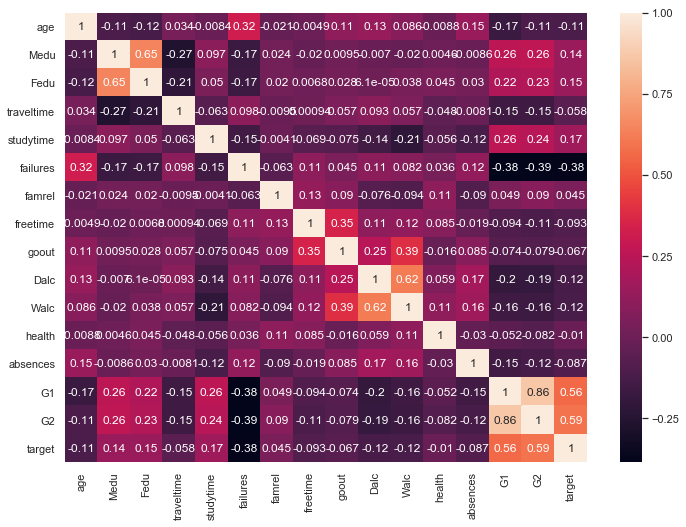

In [35]:
sns.heatmap(df.corr(), annot=True);

In [44]:
df_new=df.filter([ 'Fedu', 'reason', 'famsup', 'higher', 'romantic', 'G2', 'target'])
df_new.head()

,Fedu,reason,famsup,higher,romantic,G2,target
0,4,course,no,yes,no,11,1
1,1,course,yes,yes,no,11,1
2,1,other,no,yes,no,13,1
3,2,home,yes,yes,yes,14,1
4,3,home,yes,yes,no,13,1


In [48]:
df_new.shape

(649, 7)

### Preparation for predictive model
•	Correlation calculation
•	Variable reduction
•	Dummy variable creation


#### Correlation

In [49]:
df_new.corr()

,Fedu,G2,target
Fedu,1.000000,0.225139,0.089645
G2,0.225139,1.000000,0.403253
target,0.089645,0.403253,1.000000


### Dummy variables

In [50]:
dummy_reason=pd.get_dummies(df_new['reason'])
dummy_reason.columns = ['reason_course', 'reason_home', 'reason_other', 'reason_reputation']
dummy_reason.head()

,reason_course,reason_home,reason_other,reason_reputation
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [58]:
dummy_famsup=pd.get_dummies(df_new['famsup'])
dummy_famsup.columns = ['no_famsup', 'yes_fam']
dummy_higher=pd.get_dummies(df_new['higher'])
dummy_higher.columns = ['yes_higher', 'no_higher']
dummy_romantic=pd.get_dummies(df_new['romantic'])
dummy_romantic.columns =['no_romantic', 'yes_romantic']

In [59]:
df_new_with_dummy=df_new.merge(dummy_reason, left_index=True, right_index=True)
df_new_with_dummy=df_new_with_dummy.merge(dummy_famsup, left_index=True, right_index=True)
df_new_with_dummy=df_new_with_dummy.merge(dummy_higher, left_index=True, right_index=True)
df_new_with_dummy=df_new_with_dummy.merge(dummy_romantic, left_index=True, right_index=True)
df_new_with_dummy.columns

Index(['Fedu', 'reason', 'famsup', 'higher', 'romantic', 'G2', 'target',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'no_famsup', 'yes_fam', 'yes_higher', 'no_higher', 'no_romantic',
       'yes_romantic'],
      dtype='object')

In [64]:
df_ready=df_new_with_dummy.filter(['target','Fedu', 'G2',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'no_famsup', 'yes_fam', 'yes_higher', 'no_higher', 'no_romantic',
       'yes_romantic'])

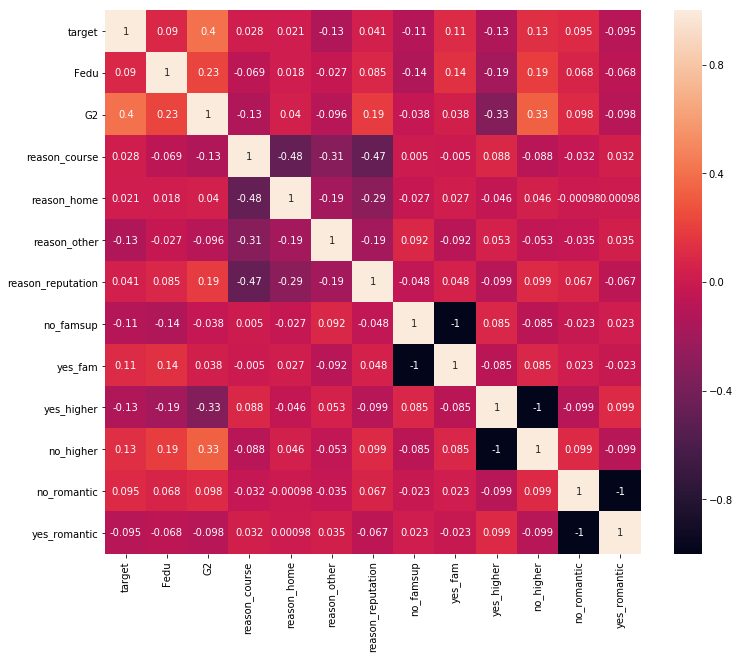

In [79]:
plt.figure(figsize=(12,10))
sns.heatmap(df_ready.corr(), annot=True);

### Model development 
•	Logistic regression
•	Probability calculation based on logistic regression


### Logistic Regression

#### split data into train and test

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [67]:
X=df_ready.filter([ 'Fedu', 'G2',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'no_famsup', 'yes_fam', 'yes_higher', 'no_higher', 'no_romantic',
       'yes_romantic'])
y=df_ready.target

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2)

In [69]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
predictions

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [70]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9692307692307692


In [73]:
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))


Accuracy: 0.9692307692307692
Precision: 0.96875
Recall: 1.0


### confusion matrix 

In [72]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[  2   4]
 [  0 124]]


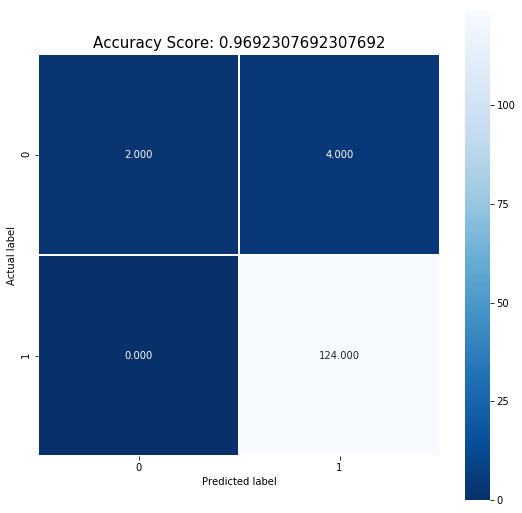

In [75]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


In the output, 124 and 2 are correct predictions, and 4 are incorrect predictions. 

True positive rate = TP/actual yes

In [76]:
from sklearn.metrics import roc_curve, auc

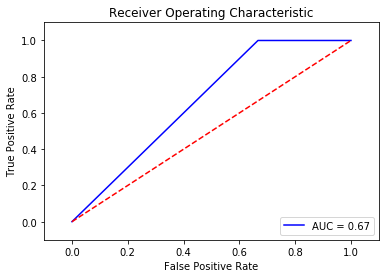

In [77]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC (area under the curve) score is 0.67 which shows that the classification model performance is still quite weak, however better that when we took a target variable >=10. 

In [ ]:
So orevall we can see that the variable reason was present in all prediction modeling, thus we can conclude that the reason to choose the school, meaning the motivation, highly affects the 